In [1]:
import pandas as pd
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
with open('news', 'r') as f:
    text = f.read()
    news = text.split("\n\n")
    count = {'sport': 0, 'world': 0, "us": 0, "business": 0, "health": 0, "entertainment": 0, "sci_tech": 0}
    i=0
    for news_item in news:
        lines = news_item.split('\n')
        file_to_write = open('data/' + lines[6] + '/' + str(count[lines[6]]) + '.txt', 'w+')
        count[lines[6]] = count[lines[6]] + 1
        file_to_write.write(news_item)  # python will convert \n to os.linesep
        file_to_write.close()
        i+=1
print("No. of News", i)

FileNotFoundError: [Errno 2] No such file or directory: 'data/sport/0.txt'

In [ ]:
category_list = ["sport", "world", "us", "business", "health", "entertainment", "sci_tech"]
directory_list = ["data/sport/*.txt", "data/world/*.txt","data/us/*.txt","data/business/*.txt","data/health/*.txt","data/entertainment/*.txt","data/sci_tech/*.txt",]

text_files = list(map(lambda x: glob.glob(x), directory_list))
text_files = [item for sublist in text_files for item in sublist]

training_data = []

for t in text_files:
    f = open(t, 'r')
    f = f.read()
    t = f.split('\n')
    training_data.append({'data' : t[0] + ' ' + t[1], 'flag' : category_list.index(t[6])})
    
training_data[0]

In [ ]:
training_data = pd.DataFrame(training_data, columns=['data', 'flag'])
training_data.to_csv("train_data.csv", sep=',', encoding='utf-8')
print(training_data.data.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#GET VECTOR COUNT
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data.data)

In [ ]:
#TRANSFORM WORD VECTOR TO TF IDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, training_data.flag, test_size=0.25, random_state=42)

In [8]:
clf_svm = svm.LinearSVC()
clf_svm.fit(X_train, y_train)

LinearSVC()

In [9]:
predicted = clf_svm.predict(X_test)

In [13]:
a =[]
label=[]

In [14]:
print(confusion_matrix(predicted,y_test))
print(accuracy_score(predicted,y_test))
a.append(accuracy_score(predicted,y_test))
label.append("SVM")

[[1974    7   14   13   10   22   14]
 [  10 1448   68   36   25    7   22]
 [  16   45  927   59   35   18   42]
 [   8   42  103 1032   23   10  100]
 [   7   13   35   26  338    4   27]
 [  13    5   23   42   20  768   22]
 [   6   16   37   89   15   18  497]]
0.8568273831431726


In [35]:
#MODEL TRAINING USING K NEAREST NEIGHBOUR
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)
predicted_knn = model_knn.predict(X_test)
print(confusion_matrix(predicted_knn,y_test))
print(accuracy_score(predicted_knn,y_test))
a.append(accuracy_score(predicted_knn,y_test))
label.append("KNN")

[[1951   24   51   39   19   84   33]
 [  21 1419  113   53   31   27   42]
 [  32   54  857   80   46   42   51]
 [  12   50  106 1000   31   27  115]
 [   4   13   32   17  314   11   31]
 [  11    5   26   30   14  643   22]
 [   3   11   22   78   11   13  430]]
0.8114341798552325


In [17]:
#MODEL TRAINING USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
predicted_rf = model_rf.predict(X_test)
print(confusion_matrix(predicted_rf,y_test))
print(accuracy_score(predicted_rf,y_test))
a.append(accuracy_score(predicted_rf,y_test))
label.append("Random Forest")

[[1953   59  105   62   34  132   85]
 [  19 1380  135   59   40   33   34]
 [  23   39  738   59   39   21   50]
 [  16   72  144  982   60   36  174]
 [   1    7   24   24  241    4   22]
 [  21   14   32   44   31  608   31]
 [   1    5   29   67   21   13  328]]
0.7643233959023432


Text(0, 0.5, 'Accuracy')

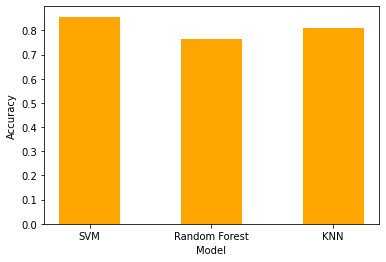

In [32]:
import matplotlib.pyplot as plt
plt.bar(x=label, height=a,color="orange",width=0.5,align="center")
plt.xlabel("Model")
plt.ylabel("Accuracy")

In [43]:
import anvil.server
anvil.server.connect("EWJIUJ5CJTAQLJ4F54UNSXKV-ZANELIJ3SYHXWTR7")

In [83]:
from vaderSentiment.vaderSentiment import SentiText
from vaderSentiment.vaderSentiment import BOOSTER_DICT
def take_words(text):
    s = SentiText(text)
    sentiments = []
    words = s.words_and_emoticons
    for item in words:
        valence = 0
        i = words.index(item)
        if (i < len(words) - 1 and item.lower() == "kind" and words[i+1].lower() == "of") or item.lower() in BOOSTER_DICT:
            sentiments.append(valence)
            continue

        sentiments = list(map(abs,SentimentIntensityAnalyzer.sentiment_valence(SentimentIntensityAnalyzer(),valence, s, item, i, sentiments)))

    sentiments = SentimentIntensityAnalyzer._but_check(words, sentiments)
    new_dict = {'sentiment':sentiments,'words':words}
    df = pd.DataFrame(new_dict)
    df = df.sort_values(by=['sentiment'],ascending=False)
    df = df.reset_index(drop=True)
    imp_words=[]
    for i in range(len(df)):
        imp_words.append(df['words'][i])
    return imp_words

In [84]:
head_line=[]
def main_headline(affect,text):
    new_list = text.split()
    head_line = []
    count =3
    for j in affect:
        string=""
        b=0
        for i in new_list:
            if(i == j):
                b=1
            if(b == 1):
                if(i[-1] == "."):
                    string+=(i[0:len(i)-1])
                    b=0
                else:
                    if count >=0:
                        count -=1
                        string+=(i+" ")
                    else:
                        b=0
                        head_line.append(string)
                        string=""
                        count = 3
            else:
                continue
                        
    return head_line

In [93]:
from nltk.tokenize import sent_tokenize
@anvil.server.callable
def noun_news(noun,text):
    affecting_words = take_words(text)
    headline = main_headline(affecting_words,text)
    sent = text.split("\n")
    np = []
    r=[]
    for i in headline:
        if noun in i:
            for j in sent:
                if i in j:
                    r.append(j)
                    return r
    return np

In [94]:
from textblob import TextBlob
def get_nouns(text):
    blob = TextBlob(text)
    return blob.noun_phrases

Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-8:
Traceback (most recent call last):
  File "c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 395, in call


Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.


    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 387, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\anvil\_threaded_server.py", line 412, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\lenovo\appdata\local\programs\python\python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\users\lenovo\appdata\local\programs\python\python38\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\anvil\server.py", line 198, in heartbeat_until

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

In [87]:
print(get_nouns('I am a very nice Hello world game. Nice one Hello String Nice were'))

['hello', 'world game', 'nice', 'hello string nice']


In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
@anvil.server.callable
def classify_news(text):
    raw_news = [text]
    loaded_vec = CountVectorizer(vocabulary=count_vect.vocabulary_)

    X_new_counts = loaded_vec.transform(raw_news)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = clf_svm.predict(X_new_tfidf)
    
    sid_obj = SentimentIntensityAnalyzer()
    text_dict = sid_obj.polarity_scores(text)
    sent=''
    if text_dict['compound'] >= 0.05 :
        sent = "Positive"
 
    elif text_dict['compound'] <= - 0.05 :
        sent = "Negative"
        
    else :
        sent = "Neutral"
    rate = text_dict['compound']*100

    noun_ph = get_nouns(text)
    affecting_words = take_words(text)
    li = main_headline(affecting_words,text)
    return (category_list[predicted[0]],sent,rate,li)